In [1]:
from Utils.util_functions import *
package = 'prim'

/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/ema_workbench/em_framework/evaluators.py:58: UserWarning: ipyparallel not installed - IpyparalleEvaluator not available
  warnings.warn("ipyparallel not installed - IpyparalleEvaluator not available")
/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_d

<module 'matplotlib.pyplot' from '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

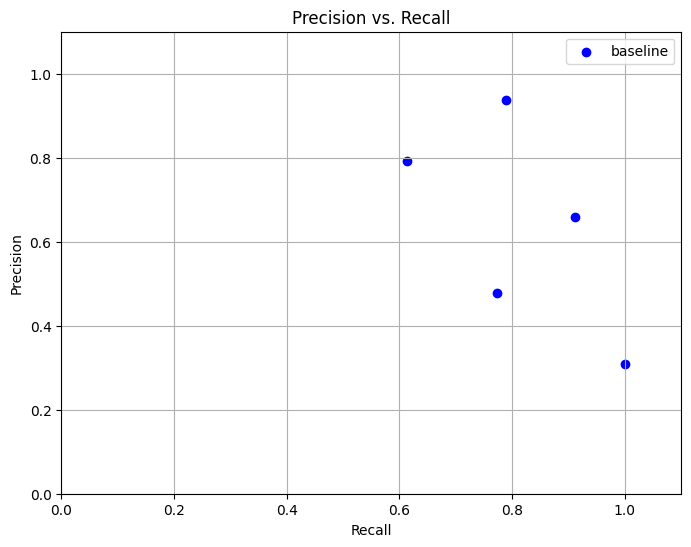

In [2]:
#baseline normal dataset, not modified
x, y = define_y_x_all_data('Rozenberg', 'SSP1', ['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5'], package)

prec_baseline, rec_baseline, boxes1 = get_list_all_precisions_recalls_boxes(x, y, package)

visualize_precision_and_recall(prec_baseline, rec_baseline, [], [], 'baseline', '')

<module 'matplotlib.pyplot' from '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

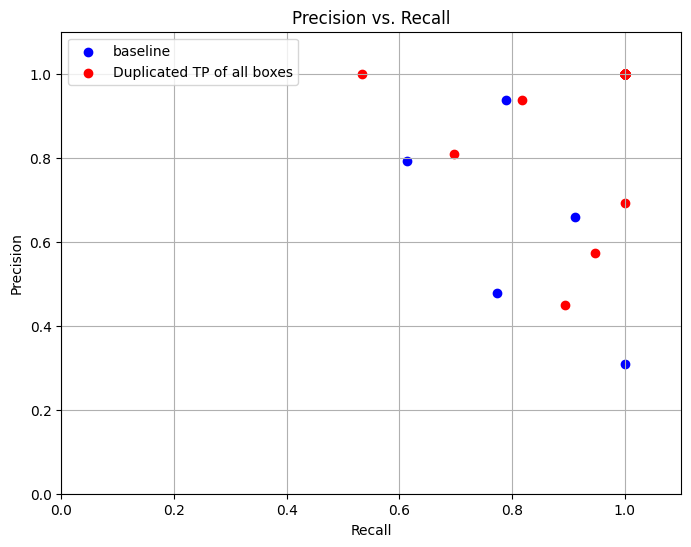

In [16]:
#duplicate 1 in each box from test data

x, y = define_y_x_all_data('Rozenberg', 'SSP1', ['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5'], package)

labels2 = y.copy()
data2 = x.copy()

#iterate over limit entries which is list of dataframes
for i in range(len(boxes1)):
        
    box = boxes1[i]
    box = pd.DataFrame(box)
    # Iterate over each row of x
    for index, row in x.iterrows():
        is_within_limits = True
        a = 0
        # Check if entry lies within the specified limits
        for column, value in row.iteritems():
            is_within_limits = (box.iloc[0, a] <= value <= box.iloc[1, a]) & is_within_limits
            a = a + 1
        if is_within_limits:
            data2.loc[len(data2)] = row
            labels2.loc[len(labels2)] = y[index]

prec_DupOnesAllBoxes, rec_DupOnesAllBoxes, boxes = get_list_all_precisions_recalls_boxes(data2, labels2, package)

visualize_precision_and_recall(prec_baseline, rec_baseline, prec_DupOnesAllBoxes, rec_DupOnesAllBoxes, 'baseline', 'Duplicated TP of all boxes')

<module 'matplotlib.pyplot' from '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

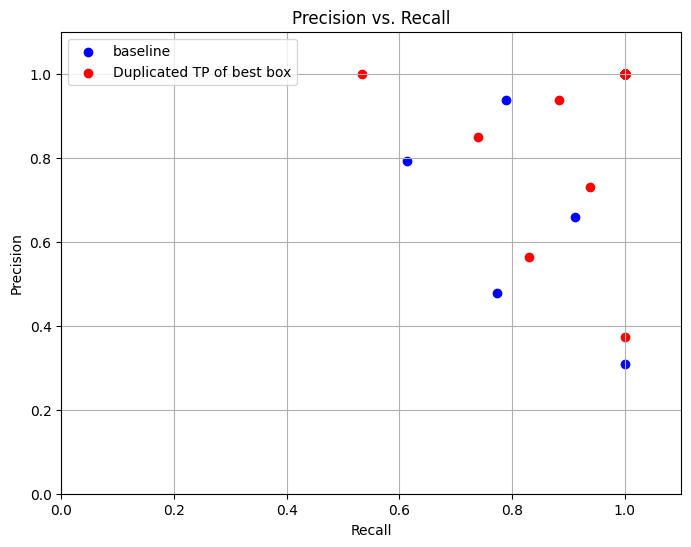

In [17]:
#duplicate 1 in best box

x, y = define_y_x_all_data('Rozenberg', 'SSP1', ['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5'], package)

labels3 = y.copy()
data3 = x.copy()
box = boxes1[len(boxes1) - 1]
box = pd.DataFrame(box)

# Iterate over each row of temp_data
for index, row in x.iterrows():
    is_within_limits = True
    # Check if entry lies within the specified limits
    for a, (column, value) in enumerate(row.iteritems()):
        is_within_limits = (box.iloc[0, a] <= value <= box.iloc[1, a]) & is_within_limits
    if is_within_limits:
        data3.loc[len(data3)] = row
        labels3.loc[len(labels3)] = y[index]

prec_DupOnesBestBox, rec_DupOnesBestBox, boxes = get_list_all_precisions_recalls_boxes(data3, labels3, package)

visualize_precision_and_recall(prec_baseline, rec_baseline, prec_DupOnesBestBox, rec_DupOnesBestBox, 'baseline', 'Duplicated TP of best box')

<module 'matplotlib.pyplot' from '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

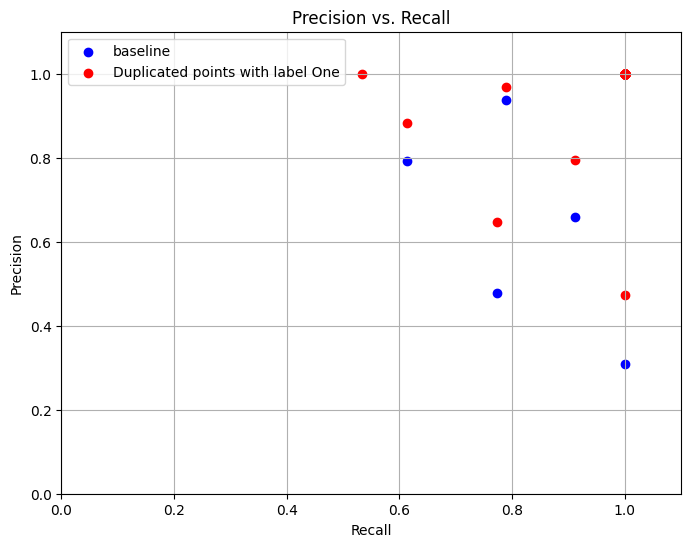

In [18]:
#duplicate all pints where label is 1
x, y = define_y_x_all_data('Rozenberg', 'SSP1', ['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5'], package)

labels4 = y.copy()
data4 = x.copy()

# Iterate over each row of temp_data
for index, row in x.iterrows():
    if y[index] == 1:
        data4.loc[len(data4)] = row
        labels4.loc[len(labels4)] = y[index]

prec_DupOnes, rec_DupOnes, boxes = get_list_all_precisions_recalls_boxes(data4, labels4, package)
    
visualize_precision_and_recall(prec_baseline, rec_baseline, prec_DupOnes, rec_DupOnes, 'baseline', 'Duplicated points with label One')

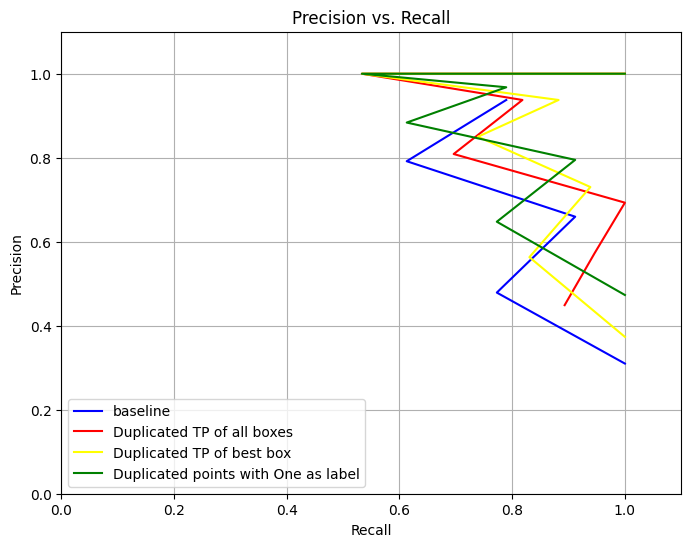

In [19]:
plt.figure(figsize=(8, 6))
plt.plot(rec_baseline, prec_baseline, c='blue', label='baseline')
plt.plot(rec_DupOnesAllBoxes, prec_DupOnesAllBoxes, c='red', label='Duplicated TP of all boxes')
plt.plot(rec_DupOnesBestBox, prec_DupOnesBestBox, c='yellow', label='Duplicated TP of best box')
plt.plot(rec_DupOnes, prec_DupOnes, c='green', label='Duplicated points with One as label')

plt.xlim(0, 1.1)
plt.ylim(0, 1.1)

# Add labels and a legend
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs. Recall')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()